In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from sklearn import svm
import io
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, precision_score
import sklearn.model_selection as model_selection
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
def load(folder):
    images = []
    for filename in os.listdir(folder):
        im = folder+"/"+filename
        fin = Image.open(im).convert('L')
        fin = fin.resize((31,37))
        fin.save(im)
        img = imread(im,as_gray=True)
        im_1d = np.reshape(img, (img.shape[0]*img.shape[1]))
        images.append(im_1d)
    return images

In [3]:
train_live = load('C:/Users/vatsa/Downloads/Assignment_data/train_live')
live_train = pd.DataFrame(train_live)
live_train['target'] = 'live'

train_spoof = load('C:/Users/vatsa/Downloads/Assignment_data/train_spoof')
spoof_train=pd.DataFrame(train_spoof)
spoof_train['target'] = 'spoof'

In [4]:
test_live = load('C:/Users/vatsa/Downloads/Assignment_data/test_live')
live_test = pd.DataFrame(test_live)
live_test['target'] = 'live'

test_spoof = load('C:/Users/vatsa/Downloads/Assignment_data/test_spoof')
spoof_test = pd.DataFrame(test_spoof)
spoof_test['target'] = 'spoof'

In [5]:
training = pd.concat([live_train,spoof_train])
testing = pd.concat([live_test,spoof_test])


In [6]:
training

,0,1,2,3,4,5,6,7,8,9,...,1138,1139,1140,1141,1142,1143,1144,1145,1146,target
0,81,83,85,88,91,94,93,93,94,95,...,134,138,142,144,153,153,144,132,125,live
1,87,89,92,94,96,98,98,98,98,98,...,191,186,180,174,166,158,149,140,134,live
2,82,84,87,90,91,92,91,92,92,92,...,159,167,169,167,161,154,144,133,127,live
3,74,76,79,82,84,86,87,88,88,89,...,168,165,159,146,127,115,111,110,110,live
4,85,87,90,92,93,95,97,98,98,99,...,179,179,178,173,165,155,141,126,115,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,77,79,81,84,87,90,92,93,93,94,...,110,131,153,161,155,146,137,131,128,spoof
203,76,77,79,82,85,88,90,91,91,92,...,123,135,147,154,149,141,132,126,124,spoof
204,79,80,82,85,88,91,93,94,95,96,...,147,150,154,157,139,129,127,130,131,spoof
205,75,76,78,81,84,87,89,90,90,91,...,160,166,161,157,149,141,133,127,124,spoof


In [7]:
testing

,0,1,2,3,4,5,6,7,8,9,...,1138,1139,1140,1141,1142,1143,1144,1145,1146,target
0,81,82,84,84,87,91,94,96,96,97,...,161,167,168,164,151,139,128,116,105,live
1,85,86,88,89,90,94,97,99,100,101,...,186,182,177,174,167,160,149,136,124,live
2,81,83,85,85,86,90,93,95,96,97,...,108,114,122,133,137,142,141,133,120,live
3,78,79,81,82,83,86,89,91,92,93,...,177,175,170,164,154,141,125,110,99,live
4,77,78,80,81,82,84,88,90,92,93,...,176,173,168,163,156,148,138,128,122,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,80,81,84,89,95,97,99,100,100,101,...,124,118,109,100,119,139,150,146,136,spoof
196,80,81,84,89,95,97,99,100,100,101,...,107,106,111,123,148,157,153,143,136,spoof
197,79,80,84,90,96,97,99,100,100,101,...,96,91,99,126,153,160,153,142,136,spoof
198,80,80,84,90,96,97,99,100,100,101,...,108,102,101,100,124,144,151,144,132,spoof


In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
target_encoded = le.fit_transform(training['target'])

print(target_encoded)
training['encoded_target'] = target_encoded

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [9]:
target_encoded = le.fit_transform(testing['target'])

print(target_encoded)
testing['encoded_target'] = target_encoded

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [10]:
training

,0,1,2,3,4,5,6,7,8,9,...,1139,1140,1141,1142,1143,1144,1145,1146,target,encoded_target
0,81,83,85,88,91,94,93,93,94,95,...,138,142,144,153,153,144,132,125,live,0
1,87,89,92,94,96,98,98,98,98,98,...,186,180,174,166,158,149,140,134,live,0
2,82,84,87,90,91,92,91,92,92,92,...,167,169,167,161,154,144,133,127,live,0
3,74,76,79,82,84,86,87,88,88,89,...,165,159,146,127,115,111,110,110,live,0
4,85,87,90,92,93,95,97,98,98,99,...,179,178,173,165,155,141,126,115,live,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,77,79,81,84,87,90,92,93,93,94,...,131,153,161,155,146,137,131,128,spoof,1
203,76,77,79,82,85,88,90,91,91,92,...,135,147,154,149,141,132,126,124,spoof,1
204,79,80,82,85,88,91,93,94,95,96,...,150,154,157,139,129,127,130,131,spoof,1
205,75,76,78,81,84,87,89,90,90,91,...,166,161,157,149,141,133,127,124,spoof,1


In [11]:
testing

,0,1,2,3,4,5,6,7,8,9,...,1139,1140,1141,1142,1143,1144,1145,1146,target,encoded_target
0,81,82,84,84,87,91,94,96,96,97,...,167,168,164,151,139,128,116,105,live,0
1,85,86,88,89,90,94,97,99,100,101,...,182,177,174,167,160,149,136,124,live,0
2,81,83,85,85,86,90,93,95,96,97,...,114,122,133,137,142,141,133,120,live,0
3,78,79,81,82,83,86,89,91,92,93,...,175,170,164,154,141,125,110,99,live,0
4,77,78,80,81,82,84,88,90,92,93,...,173,168,163,156,148,138,128,122,live,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,80,81,84,89,95,97,99,100,100,101,...,118,109,100,119,139,150,146,136,spoof,1
196,80,81,84,89,95,97,99,100,100,101,...,106,111,123,148,157,153,143,136,spoof,1
197,79,80,84,90,96,97,99,100,100,101,...,91,99,126,153,160,153,142,136,spoof,1
198,80,80,84,90,96,97,99,100,100,101,...,102,101,100,124,144,151,144,132,spoof,1


In [12]:
train = training.sample(frac=1)
print(train)

      0   1   2   3   4   5    6    7    8    9  ...  1139  1140  1141  1142  \
65   79  80  83  86  88  90   92   93   94   95  ...   132   158   165   160   
159  75  77  80  82  84  86   91   88   80   74  ...   172   165   161   155   
59   76  78  81  83  85  87   89   90   91   92  ...   160   167   161   154   
185  85  86  88  92  95  98  100  101  102  103  ...   122   156   173   166   
178  79  81  83  85  86  89   90   91   93   94  ...   115   103   106   119   
..   ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...   ...   ...   ...   ...   
71   76  77  79  82  84  86   88   90   90   91  ...   131   141   159   156   
159  80  81  83  85  87  91   93   94   95   96  ...   174   170   166   160   
180  73  75  77  79  80  84   86   88   89   90  ...   168   166   161   154   
191  80  82  84  86  87  91   93   94   95   96  ...   174   170   166   159   
9    78  79  81  84  86  88   90   92   92   92  ...   171   170   163   157   

     1143  1144  1145  1146  target  en

In [13]:
test = testing.sample(frac=1)
print(test)

      0   1   2   3   4   5   6    7    8    9  ...  1139  1140  1141  1142  \
0    81  82  84  84  87  91  94   96   96   97  ...   167   168   164   151   
137  75  75  79  84  90  91  93   94   94   95  ...   165   160   156   151   
49   70  71  74  79  85  86  88   88   88   89  ...    99   104   119   139   
25   74  75  78  83  89  90  92   93   93   93  ...   127   141   153   154   
187  76  77  79  81  82  84  87   88   85   79  ...   171   166   159   152   
..   ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...   ...   ...   ...   ...   
141  71  72  75  80  86  87  89   90   90   91  ...   161   160   155   150   
109  80  80  84  90  96  97  99  100  100  101  ...   174   171   164   159   
161  77  79  82  85  87  89  91   92   93   94  ...   168   167   159   153   
59   74  75  78  83  89  90  92   92   92   93  ...   172   170   165   159   
84   75  75  79  84  90  91  93   94   94   95  ...   163   159   155   150   

     1143  1144  1145  1146  target  encoded_target

In [14]:
test = test.drop(['target'], axis = 1)

train = train.drop(['target'], axis =1)

In [15]:
train

,0,1,2,3,4,5,6,7,8,9,...,1138,1139,1140,1141,1142,1143,1144,1145,1146,encoded_target
65,79,80,83,86,88,90,92,93,94,95,...,111,132,158,165,160,151,137,121,110,1
159,75,77,80,82,84,86,91,88,80,74,...,174,172,165,161,155,148,140,130,121,1
59,76,78,81,83,85,87,89,90,91,92,...,145,160,167,161,154,147,139,129,122,1
185,85,86,88,92,95,98,100,101,102,103,...,94,122,156,173,166,157,148,142,139,1
178,79,81,83,85,86,89,90,91,93,94,...,130,115,103,106,119,131,136,132,122,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,76,77,79,82,84,86,88,90,90,91,...,133,131,141,159,156,149,140,129,123,1
159,80,81,83,85,87,91,93,94,95,96,...,177,174,170,166,160,153,144,135,129,0
180,73,75,77,79,80,84,86,88,89,90,...,167,168,166,161,154,147,139,130,124,0
191,80,82,84,86,87,91,93,94,95,96,...,177,174,170,166,159,151,142,133,127,0


In [16]:
train

,0,1,2,3,4,5,6,7,8,9,...,1138,1139,1140,1141,1142,1143,1144,1145,1146,encoded_target
65,79,80,83,86,88,90,92,93,94,95,...,111,132,158,165,160,151,137,121,110,1
159,75,77,80,82,84,86,91,88,80,74,...,174,172,165,161,155,148,140,130,121,1
59,76,78,81,83,85,87,89,90,91,92,...,145,160,167,161,154,147,139,129,122,1
185,85,86,88,92,95,98,100,101,102,103,...,94,122,156,173,166,157,148,142,139,1
178,79,81,83,85,86,89,90,91,93,94,...,130,115,103,106,119,131,136,132,122,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,76,77,79,82,84,86,88,90,90,91,...,133,131,141,159,156,149,140,129,123,1
159,80,81,83,85,87,91,93,94,95,96,...,177,174,170,166,160,153,144,135,129,0
180,73,75,77,79,80,84,86,88,89,90,...,167,168,166,161,154,147,139,130,124,0
191,80,82,84,86,87,91,93,94,95,96,...,177,174,170,166,159,151,142,133,127,0


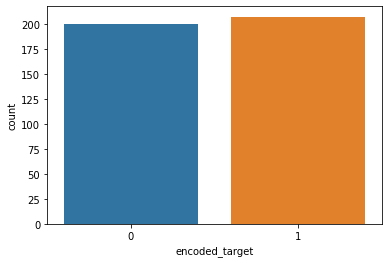

In [17]:
sns.countplot(x='encoded_target', data=train, )
plt.show()

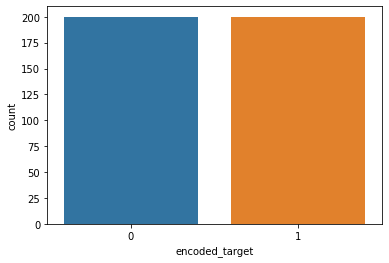

In [18]:
sns.countplot(x='encoded_target', data=test, )
plt.show()

In [19]:
encoded_target = []
for i in train.columns:
 encoded_target.append(i)

In [20]:
#TestingData
training_data_X = train.loc[:, encoded_target].values
training_data_Y = train.loc[:, ['encoded_target']].values
training_data_Y = np.ravel(training_data_Y)


In [21]:
#TestingData
testing_data_X = test.loc[:, encoded_target].values
testing_data_Y = test.loc[:, ['encoded_target']].values
testing_data_Y = np.ravel(testing_data_Y)



In [22]:
cv_folds = [5]

In [23]:
parameters={'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'C':[1,0.1,0.01],'gamma':[0.1,0.01,0.001,0.0001]}
for x in cv_folds:
    SVM_1 = GridSearchCV(SVC(), parameters, cv = x)
    SVM_1.fit(training_data_X, training_data_Y)
    
    print('The best score with Cross Validation =', x, 'is', SVM_1.score(training_data_X, training_data_Y), 'with parameters =\n\n', SVM_1.best_params_, '\n\n')

The best score with Cross Validation = 5 is 1.0 with parameters =

 {'C': 1, 'gamma': 0.1, 'kernel': 'poly'} 




In [24]:
results = SVM_1.cv_results_

In [26]:
predictions = SVM_1.predict(testing_data_X)
predictions

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,

In [27]:
print(results.get('params'))

[{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}, {'C': 1, 'gamma': 0.1, 'kernel': 'poly'}, {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}, {'C': 1, 'gamma': 0.1, 'kernel': 'sigmoid'}, {'C': 1, 'gamma': 0.01, 'kernel': 'linear'}, {'C': 1, 'gamma': 0.01, 'kernel': 'poly'}, {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}, {'C': 1, 'gamma': 0.01, 'kernel': 'sigmoid'}, {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}, {'C': 1, 'gamma': 0.001, 'kernel': 'poly'}, {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}, {'C': 1, 'gamma': 0.001, 'kernel': 'sigmoid'}, {'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}, {'C': 1, 'gamma': 0.0001, 'kernel': 'poly'}, {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}, {'C': 1, 'gamma': 0.0001, 'kernel': 'sigmoid'}, {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}, {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}, {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}, {'C': 0.1, 'gamma': 0.1, 'kernel': 'sigmoid'}, {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}, {'C': 0.1, 'gamma': 0.01, 'kernel': 'poly'}, {'C': 0.1, 'gam

In [28]:
print(SVM_1.best_params_)

{'C': 1, 'gamma': 0.1, 'kernel': 'poly'}


In [29]:
print(SVM_1.best_score_)

0.9311653116531164


In [30]:
final_model = SVM_1.best_estimator_

In [31]:
final_model

SVC(C=1, gamma=0.1, kernel='poly')

In [32]:
SVM_1_predictions = final_model.predict(testing_data_X)

In [33]:
SVM_1_predictions

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,

In [34]:
print(classification_report(testing_data_Y, SVM_1_predictions))
print(confusion_matrix(testing_data_Y, SVM_1_predictions))
print("Accuracy of the SVM Model:", metrics.accuracy_score(testing_data_Y, SVM_1_predictions)*100)

              precision    recall  f1-score   support

           0       0.90      0.83      0.87       200
           1       0.85      0.91      0.88       200

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400

[[167  33]
 [ 18 182]]
Accuracy of the SVM Model: 87.25


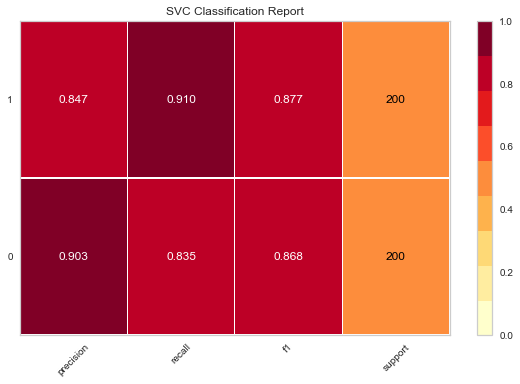

In [35]:
from yellowbrick.classifier import ClassificationReport

vizualizer_CR = ClassificationReport(final_model, support=True)
vizualizer_CR.fit(training_data_X, training_data_Y)
vizualizer_CR.score(testing_data_X, testing_data_Y)
vizualizer_CR.show();

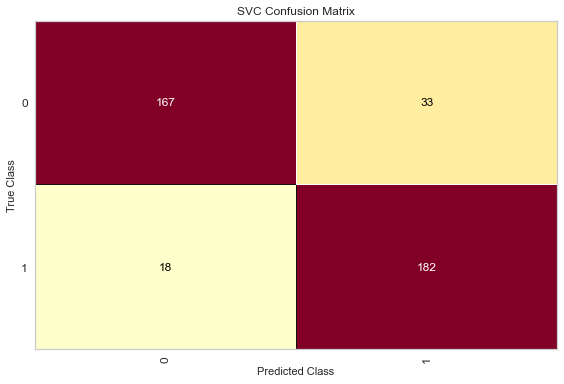

In [36]:
from yellowbrick.classifier import ConfusionMatrix

vizualizer_cm = ConfusionMatrix(final_model, support=True, label_encoder={1: 'spoof', 0: 'live'})
vizualizer_cm.fit(training_data_X, training_data_Y)
vizualizer_cm.score(testing_data_X, testing_data_Y)
vizualizer_cm.show();

AUC: 0.873


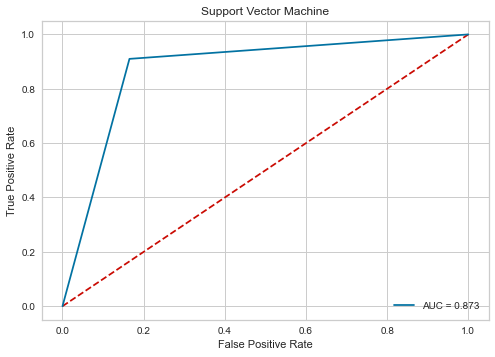

In [37]:
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import roc_curve
auc = roc_auc_score(testing_data_Y, SVM_1_predictions)
print('AUC: %0.3f' % auc)
fpr, tpr, thresholds = roc_curve(testing_data_Y, SVM_1_predictions)
pyplot.title("Support Vector Machine")
pyplot.ylabel('True Positive Rate')
pyplot.xlabel('False Positive Rate')
pyplot.plot([0, 1], [0, 1], 'r--')
pyplot.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % auc)
pyplot.legend(loc = 'lower right')
pyplot.show()

# Further exploration and analysis by combining training and testing dataset (EXPERIMENT)

In [38]:
combine = pd.concat([train,test])

In [39]:
combined_dataset = combine.sample(frac=1)
print(combined_dataset)

      0   1   2   3   4   5   6   7   8    9  ...  1138  1139  1140  1141  \
174  79  81  84  86  88  90  92  94  95   96  ...   180   177   172   167   
156  75  75  79  85  91  92  94  95  95   95  ...   165   165   164   162   
68   73  75  77  79  80  84  86  87  88   89  ...   165   162   158   155   
9    78  79  81  84  86  88  90  92  92   92  ...   155   171   170   163   
42   72  74  77  79  81  83  85  87  88   89  ...   168   164   160   155   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...   ...   ...   ...   ...   
187  81  83  85  86  87  91  93  95  97   98  ...   185   181   175   166   
61   73  74  78  83  86  88  90  91  92   93  ...   141   149   153   151   
121  83  84  85  87  90  95  97  99  99  100  ...   181   179   171   166   
199  76  78  81  83  84  87  89  92  92   92  ...    85    84    82    82   
75   73  74  74  76  77  79  83  85  86   88  ...   145   143   142   141   

     1142  1143  1144  1145  1146  encoded_target  
174   160   153   145  

<AxesSubplot:>

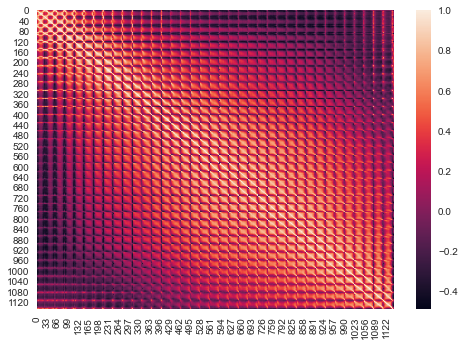

In [40]:
import seaborn as sns

sns.heatmap(combined_dataset.corr())

In [41]:
combined_dataset.info()
combined_dataset.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 807 entries, 174 to 75
Columns: 1148 entries, 0 to encoded_target
dtypes: int32(1), int64(1147)
memory usage: 7.1 MB


,0,1,2,3,4,5,6,7,8,9,...,1138,1139,1140,1141,1142,1143,1144,1145,1146,encoded_target
count,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,...,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000
mean,76.883519,78.095415,80.499380,83.302354,85.942999,88.402726,90.344486,91.508055,91.934325,92.651797,...,147.706320,148.909542,149.737299,150.007435,148.125155,143.825279,136.962825,128.925651,123.172243,0.504337
std,4.162197,4.396261,4.270586,4.215684,4.711711,4.583403,4.712613,5.050084,5.806380,6.848154,...,30.438063,28.347857,25.728259,22.392726,17.221026,13.936686,11.985976,10.584854,9.667105,0.500291
min,68.000000,69.000000,71.000000,72.000000,69.000000,63.000000,58.000000,55.000000,42.000000,29.000000,...,57.000000,52.000000,58.000000,61.000000,58.000000,55.000000,55.000000,57.000000,61.000000,0.000000
25%,74.000000,75.000000,78.000000,81.000000,84.000000,86.000000,88.000000,89.000000,90.000000,91.000000,...,125.000000,128.000000,141.000000,149.000000,148.000000,142.000000,135.000000,126.000000,121.000000,0.000000
50%,76.000000,77.000000,79.000000,83.000000,86.000000,88.000000,90.000000,92.000000,92.000000,93.000000,...,163.000000,163.000000,160.000000,158.000000,153.000000,147.000000,139.000000,130.000000,124.000000,1.000000
75%,79.000000,80.000000,83.000000,85.000000,89.000000,91.000000,93.000000,94.000000,94.000000,95.000000,...,171.000000,169.000000,166.000000,163.000000,157.000000,150.500000,142.000000,134.000000,127.000000,1.000000
max,104.000000,106.000000,108.000000,108.000000,109.000000,113.000000,117.000000,123.000000,125.000000,126.000000,...,200.000000,195.000000,192.000000,184.000000,178.000000,167.000000,159.000000,153.000000,166.000000,1.000000


In [42]:
combined_dataset.isnull().sum()
combined_dataset.value_counts("encoded_target")

encoded_target
1    407
0    400
dtype: int64

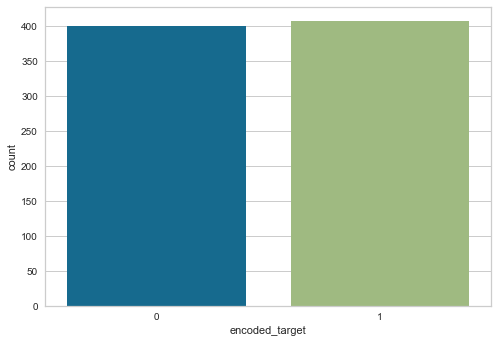

In [43]:
sns.countplot(x='encoded_target', data=combined_dataset, )
plt.show()

In [44]:
X = combined_dataset.drop(['encoded_target'], axis = 1)

y = combined_dataset['encoded_target']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [46]:
parameters={'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'C':[1,0.1,0.01],'gamma':[0.1,0.01,0.001,0.0001]}
for x in cv_folds:
    SVM = GridSearchCV(SVC(), parameters, cv = x)
    SVM.fit(X_train, y_train)
    
    print('The best score with Cross Validation =', x, 'is', SVM.score(X_test, y_test), 'with parameters =\n\n', SVM.best_params_, '\n\n')

The best score with Cross Validation = 5 is 0.9306930693069307 with parameters =

 {'C': 1, 'gamma': 0.1, 'kernel': 'poly'} 




In [47]:
experimented_results = SVM.cv_results_

In [48]:
print(SVM.best_params_)

{'C': 1, 'gamma': 0.1, 'kernel': 'poly'}


In [49]:
print(SVM.best_score_)

0.9289256198347108


In [50]:
final_model_experimented = SVM.best_estimator_

In [51]:
final_model_experimented

SVC(C=1, gamma=0.1, kernel='poly')

In [52]:
SVM_predictions = final_model_experimented.predict(X_test)

In [53]:
SVM_predictions

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0])

In [54]:
print(classification_report(y_test, SVM_predictions))
print(confusion_matrix(y_test, SVM_predictions))
print("Accuracy of the SVM Model:", metrics.accuracy_score(y_test, SVM_predictions)*100)

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       101
           1       0.95      0.91      0.93       101

    accuracy                           0.93       202
   macro avg       0.93      0.93      0.93       202
weighted avg       0.93      0.93      0.93       202

[[96  5]
 [ 9 92]]
Accuracy of the SVM Model: 93.06930693069307


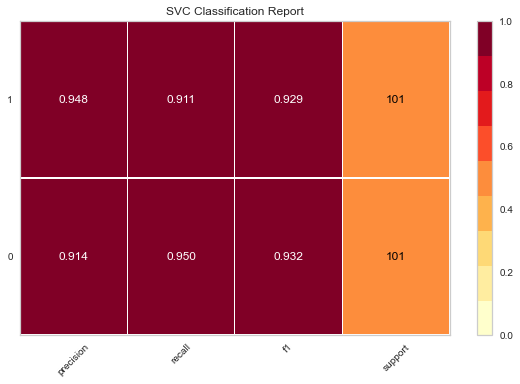

In [55]:
from yellowbrick.classifier import ClassificationReport

vizualizer_CR_EXP = ClassificationReport(final_model_experimented, support=True)
vizualizer_CR_EXP.fit(X_train, y_train)
vizualizer_CR_EXP.score(X_test, y_test)
vizualizer_CR_EXP.show();

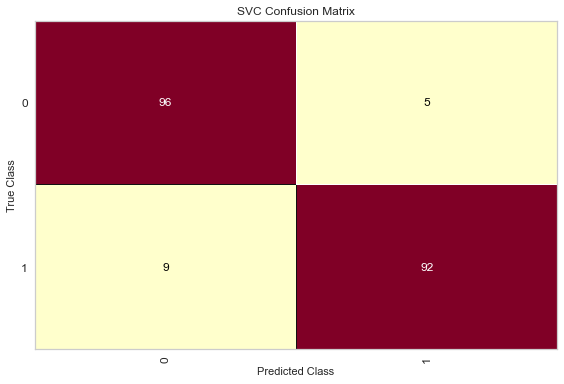

In [56]:
from yellowbrick.classifier import ConfusionMatrix

vizualizer_cm_EXP = ConfusionMatrix(final_model_experimented, support=True, label_encoder={1: 'spoof', 0: 'live'})
vizualizer_cm_EXP.fit(X_train, y_train)
vizualizer_cm_EXP.score(X_test, y_test)
vizualizer_cm_EXP.show();

AUC: 0.931


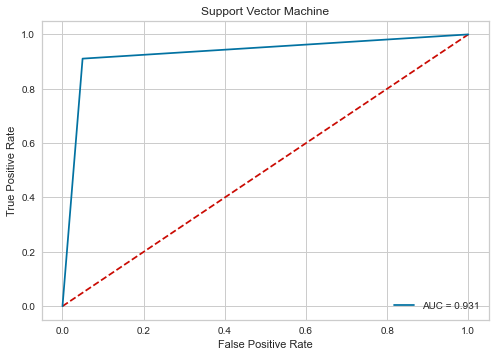

In [57]:
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import roc_curve
auc = roc_auc_score(y_test, SVM_predictions)
print('AUC: %0.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, SVM_predictions)
pyplot.title("Support Vector Machine")
pyplot.ylabel('True Positive Rate')
pyplot.xlabel('False Positive Rate')
pyplot.plot([0, 1], [0, 1], 'r--')
pyplot.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % auc)
pyplot.legend(loc = 'lower right')
pyplot.show()